In [1]:
import pandas as pd
import csv
import numpy as np
from statsmodels.tsa.api import VAR
import warnings
warnings.filterwarnings("ignore")
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint

# 1. Data preparation and illustration

### a) Select several consecutive days where the bid and ask prices for both USDKRW and KU27 have a lot of variations.

In [2]:
# read the XLSX file into a pandas DataFrame
df1 = pd.read_excel('mf821 project data.xlsx',sheet_name='USDKRW HF Data (nov23-dec04)')

In [3]:
print(df1)

                    Date  Last Price              Date.1  \
0    2017-11-23 01:29:02      1085.4 2017-11-23 01:29:02   
1    2017-11-23 01:29:02      1085.4 2017-11-23 01:29:02   
2    2017-11-23 01:29:02      1086.0 2017-11-23 01:29:02   
3    2017-11-23 01:29:02      1086.0 2017-11-23 01:29:02   
4    2017-11-23 01:28:01      1086.0 2017-11-23 01:28:01   
...                  ...         ...                 ...   
2903                 NaT         NaN                 NaT   
2904                 NaT         NaN                 NaT   
2905                 NaT         NaN                 NaT   
2906                 NaT         NaN                 NaT   
2907                 NaT         NaN                 NaT   

      Bid Price - Realtime              Date.2  Ask Price - Realtime  \
0                   1085.3 2017-11-23 01:29:02                1085.5   
1                   1085.3 2017-11-23 01:29:02                1085.5   
2                   1085.9 2017-11-23 01:29:02                1

In [4]:
df1.iloc[:,7:13]

,Date.3,Last Price.1,Date.4,Bid Price - Realtime.1,Date.5,Ask Price - Realtime.1
0,2017-11-24 01:29:33,1085.30,2017-11-24 01:29:33,1085.2,2017-11-24 01:29:33,1085.4
1,2017-11-24 01:29:33,1085.25,2017-11-24 01:29:33,1085.1,2017-11-24 01:29:33,1085.3
2,2017-11-24 01:29:33,1085.35,2017-11-24 01:29:33,1085.3,2017-11-24 01:29:33,1085.5
3,2017-11-24 01:29:33,1085.30,2017-11-24 01:29:33,1085.1,2017-11-24 01:29:33,1085.5
4,2017-11-24 01:29:04,1085.35,2017-11-24 01:29:04,1085.2,2017-11-24 01:29:04,1085.5
...,...,...,...,...,...,...
2903,NaT,NaN,NaT,NaN,NaT,NaN
2904,NaT,NaN,NaT,NaN,NaT,NaN
2905,NaT,NaN,NaT,NaN,NaT,NaN
2906,NaT,NaN,NaT,NaN,NaT,NaN


In [5]:
#Build an empty list
data = list()
for i in range((len(df1.columns)+1)//7):
    # Pick the data in csv dataframe every 7 columns as small dataframe
    temp = df1.iloc[:,7*i:7*i+6]
    # Drop NaT and NaN and change the datatype to list 
    # so that we can ignore different sets of last prices and other prices.
    # Get a 6 columns data matrix. 
    temp = temp.dropna()
    # Sort the data by index not date(time) because there are same time with different data
    temp = temp.sort_index(ascending=False)
    temp_list = temp.values.tolist()
    # Combine smaller sets of data together
    data = data + temp_list

In [6]:
# Now Transform the data list and prepare for convert the list into dataframe
used_data = list()
Date = list()
Last_Price = list()
Bid_Price = list()
Ask_Price = list()
for i in range(len(data)):
    
    Date.append(data[i][0])
    
    Last_Price.append(data[i][1])
    
    Bid_Price.append(data[i][3])
    Ask_Price.append(data[i][5])
    
used_data = (Date,Last_Price,Bid_Price,Ask_Price)
len(used_data[0])

19608

In [7]:
# Convert the datalist into dataframe and set the columns names 'Date', 'Last Price','Bid Price - Realtime','Ask Price - Realtime'
df1_used=pd.DataFrame(used_data).transpose()
df1_used.columns=['Date', 'Last Price','Bid Price - Realtime','Ask Price - Realtime']
df1_used

,Date,Last Price,Bid Price - Realtime,Ask Price - Realtime
0,2017-11-22 20:00:00,1087.55,1086.0,1089.1
1,2017-11-22 20:00:00,1087.55,1086.0,1089.1
2,2017-11-22 20:00:00,1086.25,1084.9,1087.6
3,2017-11-22 20:00:00,1086.25,1084.9,1087.6
4,2017-11-22 20:00:02,1086.4,1085.2,1086.1
...,...,...,...,...
19603,2017-12-04 01:29:01,1089.0,1088.9,1089.1
19604,2017-12-04 01:29:33,1088.95,1088.8,1089.0
19605,2017-12-04 01:29:33,1088.95,1088.8,1089.0
19606,2017-12-04 01:29:33,1088.65,1088.5,1088.8


In [8]:
# Sort the dataframe by Date
#df1_used['Date']=pd.to_datetime(df1_used['Date'])
#df1_used.sort_values(by='Date')

In [9]:
df2 = pd.read_excel('mf821 project data.xlsx',sheet_name='KUZ7 HF Data (nov23-dec04)')
print(df2)

                    Date  Last Price              Date.1  \
0    2017-11-23 01:45:01      1085.4 2017-11-23 01:45:01   
1    2017-11-23 01:45:01      1085.4 2017-11-23 01:45:01   
2    2017-11-23 01:45:01      1085.4 2017-11-23 01:45:01   
3    2017-11-23 01:45:01      1085.4 2017-11-23 01:45:01   
4    2017-11-23 01:34:31      1084.5 2017-11-23 01:34:32   
...                  ...         ...                 ...   
2067                 NaT         NaN                 NaT   
2068                 NaT         NaN                 NaT   
2069                 NaT         NaN                 NaT   
2070                 NaT         NaN                 NaT   
2071                 NaT         NaN                 NaT   

      Bid Price - Realtime              Date.2  Ask Price - Realtime  \
0                   1085.4 2017-11-23 01:45:01                1086.0   
1                   1085.4 2017-11-23 01:45:01                1086.0   
2                   1085.4 2017-11-23 01:45:01                1

In [10]:
#Build an empty list
data_2 = list()
for i in range((len(df2.columns)+1)//7):
    # Pick the data in csv dataframe every 7 columns as small dataframe
    temp = df2.iloc[:,7*i:7*i+6]
    # Drop NaT and NaN and change the datatype to list 
    # so that we can ignore different sets of last prices and other prices.
    # Get a 6 columns data matrix. 
    temp = temp.dropna()
    # Sort the data by index not date(time) because there are same time with different data
    temp = temp.sort_index(ascending=False)
    temp_list = temp.values.tolist()
    # Combine smaller sets of data together
    data_2 = data_2 + temp_list

In [11]:
# Now Transform the data list and prepare for convert the list into dataframe
used_data_2 = list()
Date_2 = list()
Last_Price_2 = list()
Bid_Price_2 = list()
Ask_Price_2 = list()
for i in range(len(data_2)):
    
    Date_2.append(data_2[i][0])
    
    Last_Price_2.append(data_2[i][1])
    
    Bid_Price_2.append(data_2[i][3])
    Ask_Price_2.append(data_2[i][5])
    
used_data_2 = (Date_2,Last_Price_2,Bid_Price_2,Ask_Price_2)
len(used_data_2[0])

10468

In [12]:
df2_used=pd.DataFrame(used_data_2).transpose()
df2_used.columns=['Date', 'Last Price','Bid Price - Realtime','Ask Price - Realtime']
df2_used

,Date,Last Price,Bid Price - Realtime,Ask Price - Realtime
0,2017-11-22 20:00:00,1086.2,1086.2,1086.4
1,2017-11-22 20:00:00,1086.2,1086.2,1086.4
2,2017-11-22 20:00:00,1086.2,1086.2,1086.4
3,2017-11-22 20:00:00,1086.2,1086.2,1086.4
4,2017-11-22 20:00:01,1086.4,1086.3,1086.5
...,...,...,...,...
10463,2017-12-04 01:33:22,1087.9,1087.8,1087.9
10464,2017-12-04 01:34:41,1087.8,1087.7,1087.8
10465,2017-12-04 01:34:41,1087.8,1087.8,1087.9
10466,2017-12-04 01:34:41,1087.6,1087.6,1087.7


In [13]:
# Group data by day not second in Date column
df1_used['Date'] = pd.to_datetime(df1_used['Date'])
# Get the variance.
variance_1B = df1_used.groupby(df1_used['Date'].dt.date)['Bid Price - Realtime'].var()
variance_1A = df1_used.groupby(df1_used['Date'].dt.date)['Ask Price - Realtime'].var()
print(variance_1B)
print(variance_1A)

Date
2017-11-22    0.863960
2017-11-23    1.649538
2017-11-24    0.057139
2017-11-26    0.531198
2017-11-27    1.330318
2017-11-28    1.474760
2017-11-29    7.216064
2017-11-30    0.375722
2017-12-01    0.432849
2017-12-03    1.737995
2017-12-04    0.132565
Name: Bid Price - Realtime, dtype: float64
Date
2017-11-22    0.798224
2017-11-23    1.645743
2017-11-24    0.065238
2017-11-26    0.505360
2017-11-27    1.360785
2017-11-28    1.446603
2017-11-29    7.281126
2017-11-30    0.383613
2017-12-01    0.431542
2017-12-03    1.711553
2017-12-04    0.138014
Name: Ask Price - Realtime, dtype: float64


In [14]:
df2_used['Date'] = pd.to_datetime(df2_used['Date'])

variance_2B = df2_used.groupby(df2_used['Date'].dt.date)['Bid Price - Realtime'].var()
variance_2A = df2_used.groupby(df2_used['Date'].dt.date)['Ask Price - Realtime'].var()
print(variance_2B)
print(variance_2A)
#Days the bid and ask prices for both USDKRW and KU27 have a lot of variations are 2017-11-27 2017-11-28 2017-11-29

Date
2017-11-22    0.797574
2017-11-23    1.973273
2017-11-24    5.771804
2017-11-26    0.453068
2017-11-27    1.371649
2017-11-28    2.944197
2017-11-29    9.262441
2017-11-30    0.401919
2017-12-01    1.198984
2017-12-03    1.777910
2017-12-04    0.146826
Name: Bid Price - Realtime, dtype: float64
Date
2017-11-22    0.797854
2017-11-23    2.032036
2017-11-24    0.491558
2017-11-26    0.452877
2017-11-27    1.443098
2017-11-28    2.554845
2017-11-29    8.152353
2017-11-30    0.483950
2017-12-01    0.763218
2017-12-03    1.777469
2017-12-04    0.150232
Name: Ask Price - Realtime, dtype: float64


In [15]:
# 2017-11-29:

In [16]:
# Select data for specific 3 days
# start_date = pd.to_datetime('2017-11-27').date()
# end_date = pd.to_datetime('2017-11-29').date()
date_selected = pd.to_datetime('2017-11-29').date()
selected_1 = (df1_used['Date'].dt.date>=date_selected)&(df1_used['Date'].dt.date<=date_selected)
df1_selected = df1_used.loc[selected_1]

selected_2 = (df2_used['Date'].dt.date>=date_selected)&(df2_used['Date'].dt.date<=date_selected)
df2_selected = df2_used.loc[selected_2]
print(df1_selected)
print(df2_selected)

                     Date Last Price Bid Price - Realtime Ask Price - Realtime
10752 2017-11-29 00:00:01    1082.15               1082.1               1082.2
10753 2017-11-29 00:00:01     1082.2               1082.1               1082.4
10754 2017-11-29 00:00:01    1082.05               1082.0               1082.1
10755 2017-11-29 00:00:01    1082.15               1082.0               1082.3
10756 2017-11-29 00:00:35    1082.15               1082.0               1082.3
...                   ...        ...                  ...                  ...
13635 2017-11-29 23:59:03     1087.1               1087.0               1087.2
13636 2017-11-29 23:59:31     1087.1               1087.0               1087.2
13637 2017-11-29 23:59:31     1087.3               1087.2               1087.4
13638 2017-11-29 23:59:31     1087.1               1087.0               1087.2
13639 2017-11-29 23:59:31     1087.3               1087.2               1087.4

[2888 rows x 4 columns]
                    Date La

### b) USDKRW and KU27 are traded at different time on exchange. Only select data from a time period where both assets are traded.

In [17]:
# Now select the data from a time period where both assets are traded. 
# Convert the Date columns to datetime type
df1_selected['Date'] = pd.to_datetime(df1_selected['Date'])
df2_selected['Date'] = pd.to_datetime(df2_selected['Date'])

# Merge the dataframes on the datetime column
merged_df = pd.merge(df1_selected,df2_selected, on='Date')

# Select data where the datetime is in both dataframes
task1 = df1_selected['Date'].isin(merged_df['Date'])
task2 = df2_selected['Date'].isin(merged_df['Date'])

df1_merged = df1_selected.loc[task1]
df2_merged = df2_selected.loc[task2]

print(df1_merged)
print(df2_merged)

                     Date Last Price Bid Price - Realtime Ask Price - Realtime
10808 2017-11-29 00:07:11     1082.3               1082.1               1082.4
10809 2017-11-29 00:07:11     1082.3               1082.1               1082.4
10810 2017-11-29 00:07:11    1082.25               1082.1               1082.4
10811 2017-11-29 00:07:11    1082.25               1082.1               1082.4
10872 2017-11-29 00:17:38    1082.05               1081.9               1082.1
...                   ...        ...                  ...                  ...
13407 2017-11-29 23:27:11     1086.9               1086.8               1087.0
13620 2017-11-29 23:57:38    1087.45               1087.3               1087.5
13621 2017-11-29 23:57:38    1087.45               1087.4               1087.5
13622 2017-11-29 23:57:38     1087.4               1087.3               1087.5
13623 2017-11-29 23:57:38    1087.45               1087.4               1087.5

[116 rows x 4 columns]
                    Date Las

### c) There may be more than one quotes in one minute. In that case, aggregate all quotes using the final data in the same minute. If there are no quotes in a minute, use the quote from the previous minute.

In [18]:
# Now try to do part (c)
# Convert the Date column to datetime type and set it as the index
df1_merged['Date'] = pd.to_datetime(df1_merged['Date'])
df2_merged['Date'] = pd.to_datetime(df2_merged['Date'])

df1_merged.set_index('Date',inplace=True)
df2_merged.set_index('Date',inplace=True)
# Resample the dataframe by minute and use the last quote
df1_re = df1_merged.resample('T').last()
df2_re = df2_merged.resample('T').last()
# Forward fill missing values with the last quote
df1_re.ffill(inplace=True)
df2_re.ffill(inplace=True)

print(df1_re)
print(df2_re)

                     Last Price  Bid Price - Realtime  Ask Price - Realtime
Date                                                                       
2017-11-29 00:07:00     1082.25                1082.1                1082.4
2017-11-29 00:08:00     1082.25                1082.1                1082.4
2017-11-29 00:09:00     1082.25                1082.1                1082.4
2017-11-29 00:10:00     1082.25                1082.1                1082.4
2017-11-29 00:11:00     1082.25                1082.1                1082.4
...                         ...                   ...                   ...
2017-11-29 23:53:00     1086.90                1086.8                1087.0
2017-11-29 23:54:00     1086.90                1086.8                1087.0
2017-11-29 23:55:00     1086.90                1086.8                1087.0
2017-11-29 23:56:00     1086.90                1086.8                1087.0
2017-11-29 23:57:00     1087.45                1087.4                1087.5

[1431 rows 

### d) Calculate mid-prices for both assets.

In [19]:
# Mid-price = (Bid price + Ask price) / 2
# Calculate the mid-price
df1_re['Mid Price'] = (df1_re['Bid Price - Realtime']+df1_re['Ask Price - Realtime'])/2
df2_re['Mid Price'] = (df2_re['Bid Price - Realtime']+df2_re['Ask Price - Realtime'])/2

print(df1_re)
print(df2_re)

                     Last Price  Bid Price - Realtime  Ask Price - Realtime  \
Date                                                                          
2017-11-29 00:07:00     1082.25                1082.1                1082.4   
2017-11-29 00:08:00     1082.25                1082.1                1082.4   
2017-11-29 00:09:00     1082.25                1082.1                1082.4   
2017-11-29 00:10:00     1082.25                1082.1                1082.4   
2017-11-29 00:11:00     1082.25                1082.1                1082.4   
...                         ...                   ...                   ...   
2017-11-29 23:53:00     1086.90                1086.8                1087.0   
2017-11-29 23:54:00     1086.90                1086.8                1087.0   
2017-11-29 23:55:00     1086.90                1086.8                1087.0   
2017-11-29 23:56:00     1086.90                1086.8                1087.0   
2017-11-29 23:57:00     1087.45                1087.

### e)  Do b), c), and d) for all days. For any consecutive days, use the first day as the training data and the second day as the testing data.

In [20]:
# Now I would like to expand (a)~(d) to all days.
df1_used['Date'] = pd.to_datetime(df1_used['Date'])
df2_used['Date'] = pd.to_datetime(df2_used['Date'])


# Merge the dataframes on the datetime column
merged_df_all = pd.merge(df1_used,df2_used, on='Date')

# Select data where the datetime is in both dataframes
task1 = df1_used['Date'].isin(merged_df_all['Date'])
task2 = df2_used['Date'].isin(merged_df_all['Date'])

df1_merged_all = df1_used.loc[task1]
df2_merged_all = df2_used.loc[task2]


print(df1_merged_all)
print(df2_merged_all)

                     Date Last Price Bid Price - Realtime Ask Price - Realtime
0     2017-11-22 20:00:00    1087.55               1086.0               1089.1
1     2017-11-22 20:00:00    1087.55               1086.0               1089.1
2     2017-11-22 20:00:00    1086.25               1084.9               1087.6
3     2017-11-22 20:00:00    1086.25               1084.9               1087.6
28    2017-11-22 20:06:01     1087.0               1086.9               1087.1
...                   ...        ...                  ...                  ...
19431 2017-12-04 01:04:01    1088.65               1088.5               1088.8
19528 2017-12-04 01:20:07    1089.65               1089.5               1089.9
19529 2017-12-04 01:20:07     1090.1               1090.0               1090.2
19530 2017-12-04 01:20:07    1089.65               1089.5               1089.8
19531 2017-12-04 01:20:07     1090.0               1089.9               1090.1

[940 rows x 4 columns]
                     Date La

In [21]:
df1_merged_all['Date'] = pd.to_datetime(df1_merged_all['Date'])
df2_merged_all['Date'] = pd.to_datetime(df2_merged_all['Date'])

df1_merged_all.set_index('Date',inplace=True)
df2_merged_all.set_index('Date',inplace=True)
# Resample the dataframe by minute and use the last quote
df1_re_all = df1_merged_all.resample('T').last()
df2_re_all = df2_merged_all.resample('T').last()
# Forward fill missing values with the last quote
df1_re_all.ffill(inplace=True)
df2_re_all.ffill(inplace=True)

print(df1_re_all)
print(df2_re_all)

                     Last Price  Bid Price - Realtime  Ask Price - Realtime
Date                                                                       
2017-11-22 20:00:00     1086.25                1084.9                1087.6
2017-11-22 20:01:00     1086.25                1084.9                1087.6
2017-11-22 20:02:00     1086.25                1084.9                1087.6
2017-11-22 20:03:00     1086.25                1084.9                1087.6
2017-11-22 20:04:00     1086.25                1084.9                1087.6
...                         ...                   ...                   ...
2017-12-04 01:16:00     1088.65                1088.5                1088.8
2017-12-04 01:17:00     1088.65                1088.5                1088.8
2017-12-04 01:18:00     1088.65                1088.5                1088.8
2017-12-04 01:19:00     1088.65                1088.5                1088.8
2017-12-04 01:20:00     1090.00                1089.9                1090.1

[16161 rows

In [22]:
# Mid-price = (Bid price + Ask price) / 2
# Calculate the mid-price
df1_re_all['Mid Price - Realtime'] = (df1_re_all['Bid Price - Realtime']+df1_re_all['Ask Price - Realtime'])/2
df2_re_all['Mid Price - Realtime'] = (df2_re_all['Bid Price - Realtime']+df2_re_all['Ask Price - Realtime'])/2

print(df1_re_all)
print(df2_re_all)

                     Last Price  Bid Price - Realtime  Ask Price - Realtime  \
Date                                                                          
2017-11-22 20:00:00     1086.25                1084.9                1087.6   
2017-11-22 20:01:00     1086.25                1084.9                1087.6   
2017-11-22 20:02:00     1086.25                1084.9                1087.6   
2017-11-22 20:03:00     1086.25                1084.9                1087.6   
2017-11-22 20:04:00     1086.25                1084.9                1087.6   
...                         ...                   ...                   ...   
2017-12-04 01:16:00     1088.65                1088.5                1088.8   
2017-12-04 01:17:00     1088.65                1088.5                1088.8   
2017-12-04 01:18:00     1088.65                1088.5                1088.8   
2017-12-04 01:19:00     1088.65                1088.5                1088.8   
2017-12-04 01:20:00     1090.00                1089.

# 2. VAR model

### a) Build a VAR model with lag 1 using the mid-prices of both assets in the first day.


In [23]:
df = pd.concat([df1_re_all['Mid Price - Realtime'],df2_re_all['Mid Price - Realtime']], axis=1)
df = df.set_index(df1_re_all.index)
delta_St = pd.DataFrame(df.diff().values[1:],index=df.index[1:], columns=df.columns)
delta_St.index = delta_St.index.date
delta_St

,Mid Price - Realtime,Mid Price - Realtime
2017-11-22,0.00,0.0
2017-11-22,0.00,0.0
2017-11-22,0.00,0.0
2017-11-22,0.00,0.0
2017-11-22,0.00,0.0
...,...,...
2017-12-04,0.00,0.0
2017-12-04,0.00,0.0
2017-12-04,0.00,0.0
2017-12-04,0.00,0.0


In [24]:
dates = delta_St.index.unique()
dates

Index([2017-11-22, 2017-11-23, 2017-11-24, 2017-11-25, 2017-11-26, 2017-11-27,
       2017-11-28, 2017-11-29, 2017-11-30, 2017-12-01, 2017-12-02, 2017-12-03,
       2017-12-04],
      dtype='object')

In [25]:
model = VAR(delta_St[delta_St.index == dates[1]])
results = model.fit(maxlags=1)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 12, Apr, 2023
Time:                     23:23:04
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -9.90517
Nobs:                     1439.00    HQIC:                  -9.91895
Log likelihood:           3064.88    FPE:                4.88305e-05
AIC:                     -9.92716    Det(Omega_mle):     4.86275e-05
--------------------------------------------------------------------
Results for equation Mid Price - Realtime
                             coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------
const                          -0.002898         0.002034           -1.425           0.154
L1.Mid Price - Realtime         0.007551         0.030144            0.250           0.802
L1.Mi

### b) Identify dynamics of the co-integration factor using the procedures listed in the lecture slides. 

In [26]:
co_int_factor = []

for date in dates:
    delta_St_sub = delta_St[delta_St.index == date]

    # Fit a VAR model to the selected data and print the summary
    model = VAR(delta_St_sub)
    results = model.fit(maxlags=1)
    
    B = results.coefs[0]
    I = np.identity(2)
    k = (1 - B) / 1

    # spectral decomposition of k
    k_bar, U = np.linalg.eig(k)
    U_inv = np.linalg.inv(U)

    # co-integration factor
    co_int_factor.append(U_inv[0,:])

co_int_factor

[array([0.71658535, 0.69762305]),
 array([-0.71276263,  0.70156087]),
 array([0.7072519 , 0.70696167]),
 array([0.70710678, 0.70710678]),
 array([-0.7096217 ,  0.70461375]),
 array([-0.70710842,  0.70710515]),
 array([0.70819222, 0.7060213 ]),
 array([0.70751688, 0.70669667]),
 array([-0.70710993,  0.70710363]),
 array([0.70747801, 0.70673537]),
 array([0.70710678, 0.70710678]),
 array([-0.70704272,  0.70718467]),
 array([0.71757668, 0.69671235])]

In [27]:
residuals = results.resid

def two_scale_variance(diff_series, tau):
    n = len(diff_series)
    sum_sq_diff = np.sum(np.square(np.diff(diff_series[tau-1:], axis=0)), axis=1)
    return np.sum(sum_sq_diff) / (2 * (n - tau))

# compute two-scale variances of first differences
max_lag = 1
variances = [two_scale_variance(residuals, lag) for lag in range(1, max_lag+1)]

# Divided by the length of a day to get the averaged instantaneous variance. 
averaged_variance = np.sum(variances)/len(variances)

# Take square root to get the averaged instantaneous volatility.
averaged_instantaneous_volatility = np.sqrt(averaged_variance)
averaged_instantaneous_volatility

0.16190705719636125

### c) See if the co-integration factor has strong auto-correlation.


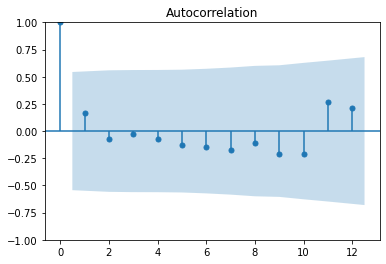

In [28]:
co_int_factor_mag = np.linalg.norm(co_int_factor, axis=1)
plot_acf(co_int_factor_mag)
plt.show()

# 3.Trading strategy using ad-hoc bands

### a) Design several trading strategies for a trading day (within the time period chosen in 1 b)).

In [29]:
# Now select the data from a time period where both assets are traded. 
# Convert the Date columns to datetime type
df1_selected['Date'] = pd.to_datetime(df1_selected['Date'])
df2_selected['Date'] = pd.to_datetime(df2_selected['Date'])

# Merge the dataframes on the datetime column
merged_df = pd.merge(df1_selected,df2_selected, on='Date')

# Select data where the datetime is in both dataframes
task1 = df1_selected['Date'].isin(merged_df['Date'])
task2 = df2_selected['Date'].isin(merged_df['Date'])

df1_merged = df1_selected.loc[task1]
df2_merged = df2_selected.loc[task2]
df1_merged

,Date,Last Price,Bid Price - Realtime,Ask Price - Realtime
10808,2017-11-29 00:07:11,1082.3,1082.1,1082.4
10809,2017-11-29 00:07:11,1082.3,1082.1,1082.4
10810,2017-11-29 00:07:11,1082.25,1082.1,1082.4
10811,2017-11-29 00:07:11,1082.25,1082.1,1082.4
10872,2017-11-29 00:17:38,1082.05,1081.9,1082.1
...,...,...,...,...
13407,2017-11-29 23:27:11,1086.9,1086.8,1087.0
13620,2017-11-29 23:57:38,1087.45,1087.3,1087.5
13621,2017-11-29 23:57:38,1087.45,1087.4,1087.5
13622,2017-11-29 23:57:38,1087.4,1087.3,1087.5


In [30]:
# Now try to do part (c)
# Convert the Date column to datetime type and set it as the index
df1_merged['Date'] = pd.to_datetime(df1_merged['Date'])
df2_merged['Date'] = pd.to_datetime(df2_merged['Date'])

df1_merged.set_index('Date',inplace=True)
df2_merged.set_index('Date',inplace=True)
# Resample the dataframe by minute and use the last quote
df1_re = df1_merged.resample('T').last()
df2_re = df2_merged.resample('T').last()

df1_29 = df1_re.dropna()
df2_29 = df2_re.dropna()

df29 = pd.DataFrame()
df29['USDKRW'] = (df1_29['Bid Price - Realtime']+df1_29['Ask Price - Realtime'])/2
df29['KUZ'] = (df2_29['Bid Price - Realtime']+df2_29['Ask Price - Realtime'])/2
df29

,USDKRW,KUZ
Date,,
2017-11-29 00:07:00,1082.25,1082.00
2017-11-29 00:17:00,1081.85,1081.45
2017-11-29 00:20:00,1081.70,1081.85
2017-11-29 00:24:00,1081.85,1081.55
2017-11-29 01:08:00,1080.30,1080.25
2017-11-29 01:12:00,1079.85,1079.45
2017-11-29 01:16:00,1079.55,1079.15
2017-11-29 19:42:00,1081.90,1081.65
2017-11-29 19:44:00,1081.70,1081.55


In [31]:
#score, pvalue, _ = coint(df29['USDKRW'], df29['KUZ'])
#beta = np.log(df29['USDKRW']) - score * np.log(df29['KUZ'])

In [32]:
def ratio_trade(S1, S2, window1, window2):
    
    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1, center=False).mean()
    ma2 = ratios.rolling(window=window2, center=False).mean()
    std = ratios.rolling(window=window2, center=False).std()
    zscore = (ma1 - ma2)/std
    
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    for i in range(len(ratios)):
        # Buy S1 sell S2
        if zscore[i] < -1:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
            print(money)
        # Buy S2 sell S1
        elif zscore[i] > 1:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
            print(money)
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.5:
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = 0
            countS2 = 0
            print(money)
                       
    return money

In [33]:
ratio_trade(df29['USDKRW'], df29['KUZ'], 1, 5)

0.0
0.0
0.0
0.0
1.3537890899381402
1.3537890899381402
1.3537890899381402
1.3537890899381402
1.3537890899381402
1.8547214228893703
1.8547214228893703
1.8547214228893703
1.8547214228893703
1.8547214228893703


1.8547214228893703

### b) Choose several ad-hoc bands: buy the co-integration factor when the lower band is reached, sell the co-integration factor when the upper band is reached, liquidate the position when the end of day is reached. Set the trading cost c as the average half spread.


In [34]:
start_date = pd.to_datetime('2017-11-22').date()
end_date = pd.to_datetime('2017-12-04').date()
selected_1 = (df1_used['Date'].dt.date>=start_date)&(df1_used['Date'].dt.date<=end_date)
df1_selected = df1_used.loc[selected_1]

selected_2 = (df2_used['Date'].dt.date>=start_date)&(df2_used['Date'].dt.date<=end_date)
df2_selected = df2_used.loc[selected_2]
#print(df1_selected)
#print(df2_selected)

In [35]:
# Now select the data from a time period where both assets are traded. 
# Convert the Date columns to datetime type
df1_selected['Date'] = pd.to_datetime(df1_selected['Date'])
df2_selected['Date'] = pd.to_datetime(df2_selected['Date'])

# Merge the dataframes on the datetime column
merged_df = pd.merge(df1_selected,df2_selected, on='Date')

# Select data where the datetime is in both dataframes
task1 = df1_selected['Date'].isin(merged_df['Date'])
task2 = df2_selected['Date'].isin(merged_df['Date'])

df1_merged = df1_selected.loc[task1]
df2_merged = df2_selected.loc[task2]

#print(df1_merged)
#print(df2_merged)

In [36]:
# Now try to do part (c)
# Convert the Date column to datetime type and set it as the index
df1_merged['Date'] = pd.to_datetime(df1_merged['Date'])
df2_merged['Date'] = pd.to_datetime(df2_merged['Date'])

df1_merged.set_index('Date',inplace=True)
df2_merged.set_index('Date',inplace=True)
# Resample the dataframe by minute and use the last quote
df1_re = df1_merged.resample('T').last()
df2_re = df2_merged.resample('T').last()

df1_re = df1_re.dropna()
df2_re = df2_re.dropna()

df = pd.DataFrame()
df['USDKRW'] = (df1_re['Bid Price - Realtime']+df1_re['Ask Price - Realtime'])/2
df['KUZ'] = (df2_re['Bid Price - Realtime']+df2_re['Ask Price - Realtime'])/2
df['cost'] = (df1_re['Ask Price - Realtime']+df2_re['Ask Price - Realtime']- df1_re['Bid Price - Realtime']-df2_re['Bid Price - Realtime'])/2

df

,USDKRW,KUZ,cost
Date,,,
2017-11-22 20:00:00,1086.25,1086.30,1.45
2017-11-22 20:06:00,1087.05,1087.15,0.10
2017-11-22 20:27:00,1086.90,1087.05,0.15
2017-11-22 20:33:00,1087.40,1087.10,0.20
2017-11-22 20:36:00,1087.35,1087.05,0.20
...,...,...,...
2017-12-04 00:06:00,1089.00,1089.05,0.15
2017-12-04 00:33:00,1089.10,1088.75,0.15
2017-12-04 00:57:00,1088.50,1088.55,0.15


In [37]:
# Compute co-integration factor
score, pvalue, _ = coint(df['USDKRW'], df['KUZ'])
beta = np.log(df['USDKRW']) - score * np.log(df['KUZ'])

### one std dev:

In [38]:
# Define ad-hoc bands
mean = beta.mean()
std = beta.std()
lower_band = mean - std
upper_band = mean +  std
exit_low = mean - 0.1*std
exit_up = mean + 0.1*std

In [39]:
# Define trading strategy
def pairs_trading(df, beta, lower_band, upper_band, exit_low, exit_up):
    positions = pd.Series(index=df.index)
    positions.iloc[0] = 0
    cash = pd.Series(index=df.index)
    cash.iloc[0] = 0
          
    for i in range(1, len(df)):
        if positions.iloc[i-1] == 0:
            if beta.iloc[i] < lower_band: # buy s1 sell s2
                positions.iloc[i] = 1
                cash.iloc[i] = cash.iloc[i-1] - df['USDKRW'].iloc[i] + beta.iloc[i] * df['KUZ'].iloc[i] - df['cost'].iloc[i] 
            elif beta.iloc[i] > upper_band:  # sell s1 buy s2
                positions.iloc[i] = -1
                cash.iloc[i] = cash.iloc[i-1] + df['USDKRW'].iloc[i] - beta.iloc[i] * df['KUZ'].iloc[i] - df['cost'].iloc[i] 
            else: 
                positions.iloc[i] = 0 #remain
                cash.iloc[i] = cash.iloc[i-1]

        elif positions.iloc[i-1]  == 1:                          
            if beta.iloc[i] > exit_low: # sell s1 buy s2
                positions.iloc[i] = 0
                cash.iloc[i] = cash.iloc[i-1] + df['USDKRW'].iloc[i] - beta.iloc[i] * df['KUZ'].iloc[i] - df['cost'].iloc[i] 
            else:
                positions.iloc[i] = 1 #remain
                cash.iloc[i] = cash.iloc[i-1]

        elif positions.iloc[i-1]  == -1:
            if beta.iloc[i] < exit_up: # buy s1 sell s2
                positions.iloc[i] = 0
                cash.iloc[i] = cash.iloc[i-1] - df['USDKRW'].iloc[i] + beta.iloc[i] * df['KUZ'].iloc[i] - df['cost'].iloc[i]  
            else:
                positions.iloc[i] = -1 #remain
                cash.iloc[i] = cash.iloc[i-1]

    return positions, cash

In [40]:
pairs_trading(df, beta, lower_band, upper_band,exit_low, exit_up)

(Date
 2017-11-22 20:00:00    0.0
 2017-11-22 20:06:00    0.0
 2017-11-22 20:27:00    0.0
 2017-11-22 20:33:00    0.0
 2017-11-22 20:36:00    0.0
                       ... 
 2017-12-04 00:06:00   -1.0
 2017-12-04 00:33:00   -1.0
 2017-12-04 00:57:00   -1.0
 2017-12-04 01:04:00   -1.0
 2017-12-04 01:20:00   -1.0
 Length: 235, dtype: float64,
 Date
 2017-11-22 20:00:00        0.000000
 2017-11-22 20:06:00        0.000000
 2017-11-22 20:27:00        0.000000
 2017-11-22 20:33:00        0.000000
 2017-11-22 20:36:00        0.000000
                            ...     
 2017-12-04 00:06:00   -57379.116453
 2017-12-04 00:33:00   -57379.116453
 2017-12-04 00:57:00   -57379.116453
 2017-12-04 01:04:00   -57379.116453
 2017-12-04 01:20:00   -57379.116453
 Length: 235, dtype: float64)

In [1]:
pairs_df1 = pd.DataFrame(pairs_trading(df, beta, lower_band, upper_band,exit_low, exit_up)[1])
pd.set_option('display.max_rows', None)
pairs_df1

NameError: name 'pd' is not defined

### two std dev:

In [42]:
# Define ad-hoc bands
mean = beta.mean()
std = beta.std()
lower_band2 = mean - 2*std
upper_band2 = mean + 2*std
exit_low2 = mean - 0.2*std
exit_up2 = mean + 0.2*std

In [43]:
# Define trading strategy
def pairs_trading2(df, beta, lower_band2, upper_band2, exit_low2, exit_up2):
    positions = pd.Series(index=df.index)
    positions.iloc[0] = 0
    cash = pd.Series(index=df.index)
    cash.iloc[0] = 0
          
    for i in range(1, len(df)):
        if positions.iloc[i-1] == 0:
            if beta.iloc[i] < lower_band2: # buy s1 sell s2
                positions.iloc[i] = 1
                cash.iloc[i] = cash.iloc[i-1] - df['USDKRW'].iloc[i] + beta.iloc[i] * df['KUZ'].iloc[i] - df['cost'].iloc[i] 
            elif beta.iloc[i] > upper_band2:  # sell s1 buy s2
                positions.iloc[i] = -1
                cash.iloc[i] = cash.iloc[i-1] + df['USDKRW'].iloc[i] - beta.iloc[i] * df['KUZ'].iloc[i] - df['cost'].iloc[i] 
            else: 
                positions.iloc[i] = 0 #remain
                cash.iloc[i] = cash.iloc[i-1]

        elif positions.iloc[i-1]  == 1:                          
            if beta.iloc[i] > exit_low2: # sell s1 buy s2
                positions.iloc[i] = 0
                cash.iloc[i] = cash.iloc[i-1] + df['USDKRW'].iloc[i] - beta.iloc[i] * df['KUZ'].iloc[i] - df['cost'].iloc[i] 
            else:
                positions.iloc[i] = 1 #remain
                cash.iloc[i] = cash.iloc[i-1]

        elif positions.iloc[i-1]  == -1:
            if beta.iloc[i] < exit_up2: # buy s1 sell s2
                positions.iloc[i] = 0
                cash.iloc[i] = cash.iloc[i-1] - df['USDKRW'].iloc[i] + beta.iloc[i] * df['KUZ'].iloc[i] - df['cost'].iloc[i]  
            else:
                positions.iloc[i] = -1 #remain
                cash.iloc[i] = cash.iloc[i-1]

    return positions, cash

In [44]:
pairs_trading2(df, beta, lower_band2, upper_band2, exit_low2, exit_up2)

(Date
 2017-11-22 20:00:00    0.0
 2017-11-22 20:06:00    0.0
 2017-11-22 20:27:00    0.0
 2017-11-22 20:33:00    0.0
 2017-11-22 20:36:00    0.0
                       ... 
 2017-12-04 00:06:00    0.0
 2017-12-04 00:33:00    0.0
 2017-12-04 00:57:00    0.0
 2017-12-04 01:04:00    0.0
 2017-12-04 01:20:00    0.0
 Length: 235, dtype: float64,
 Date
 2017-11-22 20:00:00      0.000000
 2017-11-22 20:06:00      0.000000
 2017-11-22 20:27:00      0.000000
 2017-11-22 20:33:00      0.000000
 2017-11-22 20:36:00      0.000000
                           ...    
 2017-12-04 00:06:00   -869.762245
 2017-12-04 00:33:00   -869.762245
 2017-12-04 00:57:00   -869.762245
 2017-12-04 01:04:00   -869.762245
 2017-12-04 01:20:00   -869.762245
 Length: 235, dtype: float64)

### c) For each consecutive days, build the VAR model using mid-prices in the first day and test the performance using the mid-prices in the second day. Do this on a rolling window and compare the performance of these trading strategies using mean, variance and Sharpe ratio of P&Ls.

In [46]:
df1 = pd.DataFrame(df1_re_all)
df2 = pd.DataFrame(df2_re_all)

# Merge the datasets on the index (Date)
df = pd.merge(df1, df2, left_index=True, right_index=True, suffixes=('_stock1', '_stock2'))
df['Stock1'] = df['Mid Price - Realtime_stock1']
df['Stock2'] = df['Mid Price - Realtime_stock2']

# Parameters for the rolling window
window_size = 60  # 60 minutes (1 hour)
step_size = 2  # 1 minute

# Calculate P&Ls for each window
pnl_list = []

for i in range(0, len(df) - window_size, step_size):
    df_sub = df.iloc[i:i + window_size]
    delta_St = df_sub[['Stock1', 'Stock2']].diff().dropna()

    # Fit a VAR model
    model = VAR(delta_St)
    results = model.fit(maxlags=1)

    B = results.coefs[0]
    I = np.identity(2)
    k = (1 - B) / 1

    # Spectral decomposition of k
    k_bar, U = np.linalg.eig(k)
    U_inv = np.linalg.inv(U)

    # Co-integration factor
    co_int_factor = U_inv[0, :]

    # Calculate the spread
    spread = df_sub['Stock1'] - co_int_factor[1] * df_sub['Stock2']


    # Set thresholds
    entry_threshold = 0.65
    exit_threshold = -2000

    # Initialize variables
    position = 0
    pnl = 0

    for j in range(1, len(spread)):
        if position == 0:
            if spread[j] < -entry_threshold:
                position = 1
            elif spread[j] > entry_threshold:
                position = -1
        elif position == 1:
            pnl += (spread[j] - spread[j - 1])
            if spread[j] > exit_threshold:
                position = 0
        elif position == -1:
            pnl -= (spread[j] - spread[j - 1])
            if spread[j] < -exit_threshold:
                position = 0

    pnl_list.append(pnl)

# Calculate mean, variance, and Sharpe ratio
pnl_mean = np.mean(pnl_list)
pnl_var = np.var(pnl_list)
sharpe_ratio = pnl_mean / np.sqrt(pnl_var)

print(f"Mean P&L: {pnl_mean}")
print(f"Variance of P&L: {pnl_var}")
print(f"Sharpe Ratio: {sharpe_ratio}")

Mean P&L: 0.0083434379819466
Variance of P&L: 0.08502601328488227
Sharpe Ratio: 0.0286133781177572
